In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data.shape

(30, 2)

In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


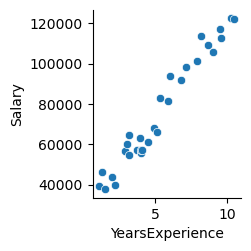

In [8]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience', data = data)

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
X = data['YearsExperience']
y = data['Salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

In [12]:
X_train.shape

(21,)

In [13]:
X_test.shape

(9,)

In [14]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        14:06:52   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

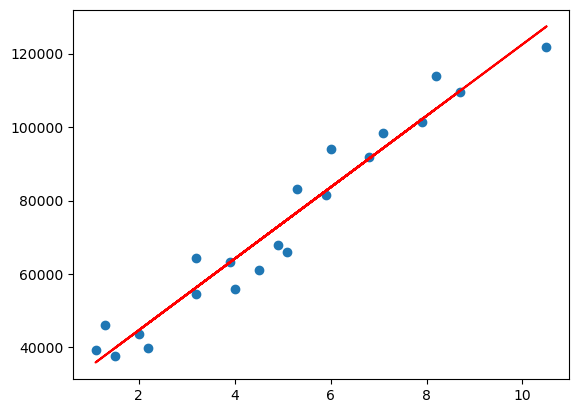

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 25200 + X_train*9731.2038,'r')
plt.show()

In [17]:
y_train_pred = model.predict(X_train_sm)

In [18]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [19]:
residual = (y_train - y_train_pred)

In [20]:
residual.head()

17    6309.731871
22    -777.398108
11   -8333.703139
4    -6720.536230
29   -5508.528088
dtype: float64

<Axes: ylabel='Density'>

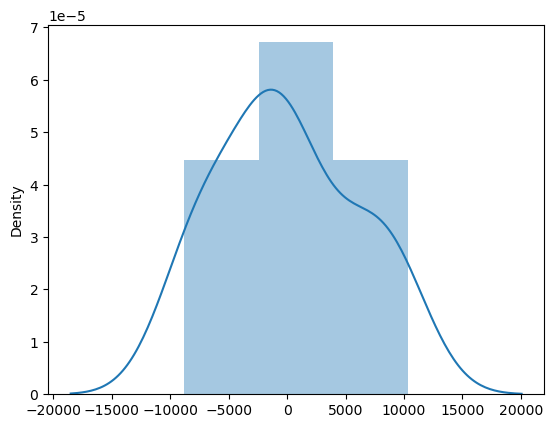

In [21]:
sns.distplot(residual)

<Axes: xlabel='YearsExperience', ylabel='None'>

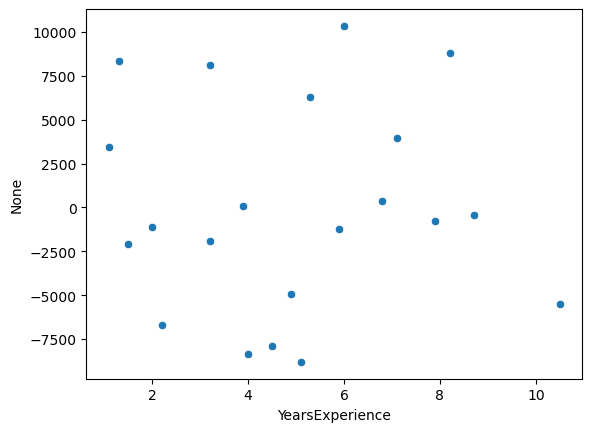

In [22]:
sns.scatterplot(x=X_train, y=residual)

In [23]:
X_test_sm = sm.add_constant(X_test)

In [24]:
y_pred = model.predict(X_test_sm)

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

np.float64(5505.479002176114)

In [26]:
r2_score(y_test,y_pred)

0.9627668685473272

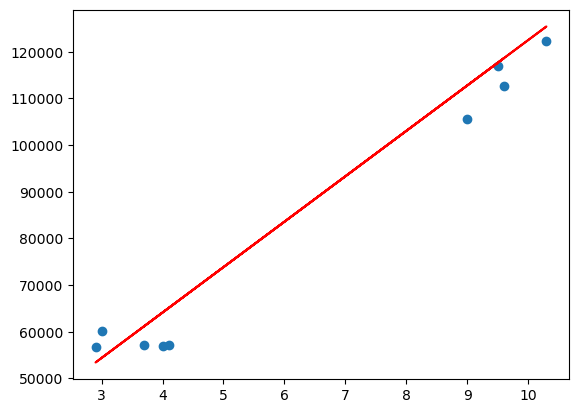

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 25200 + X_test*9731.2038, 'r')
plt.show()